# 군집 - DBSCAN

밀도 기반 데이터 클러스터링 알고리즘

클러스터의 개수를 미리 지정할 필요가 없다
복잡한 형상의 데이터 셋에도 무리 없이 사용 가능

어떤 클래스에도 속하지 않는 포인트를 구분할 수 있다.

속도는 다소 느리다 

## #01. 패키지 참조

In [1]:
import seaborn as sb
from matplotlib import pyplot as plt

from sklearn.datasets import make_moons

from sklearn.cluster import DBSCAN

from sklearn.preprocessing import StandardScaler


## #02. 데이터 셋 생성

두개의 반원 형태의 데이터 셋으 생성한다.

클러스터링 및 분류 알고리즘을 연습하기 위한 장난감 데이터 셋



In [2]:
x,y = make_moons(n_samples=200, noise = 0.05 , random_state=43)
x.shape , y.shape

((200, 2), (200,))

In [4]:
x

array([[-2.39305258e-01,  9.68884712e-01],
       [ 2.35058132e-01,  8.60072983e-01],
       [-6.31427441e-01,  8.54931512e-01],
       [-8.12781932e-01,  5.87617104e-01],
       [-8.45524288e-01,  6.18016680e-01],
       [ 1.87805246e+00,  1.54273630e-01],
       [ 1.90366884e+00,  4.83363579e-03],
       [ 9.45531364e-01,  2.70779464e-01],
       [ 3.52698860e-01, -2.40228924e-01],
       [-4.87318235e-01,  9.14452842e-01],
       [-5.01481831e-01,  8.77938039e-01],
       [ 9.46642475e-01,  4.91345927e-01],
       [ 5.74468729e-01, -3.11009968e-01],
       [ 1.99344963e+00,  3.77762837e-01],
       [ 8.98223547e-01, -5.35097054e-01],
       [ 3.88228160e-01,  9.03512968e-01],
       [ 1.68029653e+00, -3.44389839e-01],
       [ 9.40969902e-01, -4.73119160e-01],
       [-1.03810186e+00,  2.05949499e-01],
       [ 5.80248164e-01,  8.45269349e-01],
       [ 1.06289720e+00,  8.88124594e-03],
       [ 9.97243306e-01,  6.54457254e-02],
       [ 2.32883318e-01, -8.32047805e-02],
       [ 1.

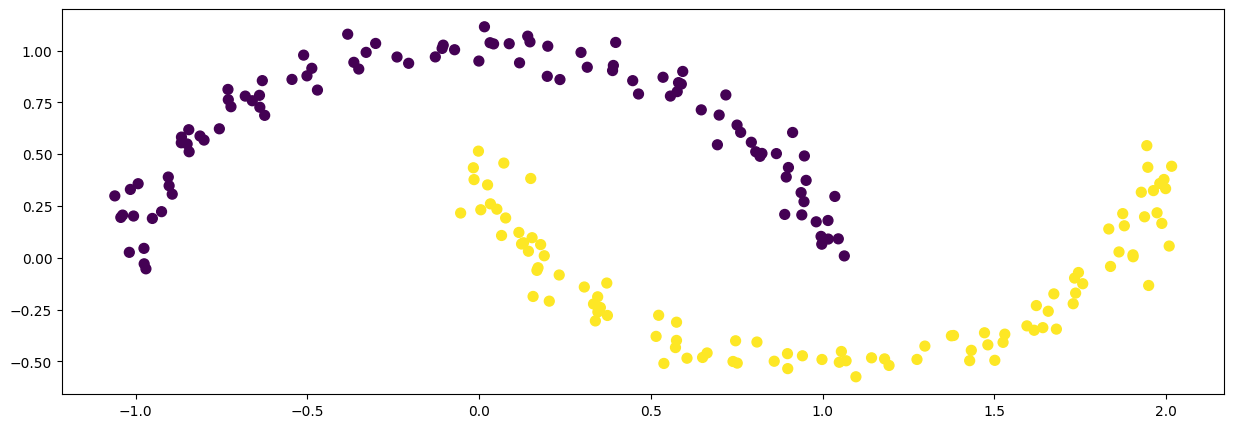

In [5]:
plt.figure(figsize=(15,5))
plt.scatter(x=x[:,0],y=x[:,1],c=y,s=50,cmap='viridis')
plt.show()
plt.close()

## #03. 데이터 전처리 

### 데이터 표준화


In [6]:
scaler = StandardScaler()
scaler.fit(x)
n_data = scaler.transform(x)
n_data[:4]

array([[-0.84633679,  1.44650639],
       [-0.30345439,  1.22720326],
       [-1.29509872,  1.21684095],
       [-1.5026488 ,  0.67808574]])

## #04. 클러스터링 모델 구현

### 'DBSCAN()'의 주요 파라미터

| 파라미터 | 설명 | 기본값 |
|---|---|---|
| eps | 핵심 포인트를 중심으로 측정되는 거리값 () | 0.5 |
| min_samples | 핵심 포인트를 중심점으로 삼는 지역의 표본 수 | 5 |

### 주요 용어
| 용어 | 설명 |
|--|--|
| 핵심포인트 | eps 거리 안헤서 데이터가 지정한 min_samples 갯수를 만족시키는 밀집지역내 데이터 포인트 |
| 밀집 지역 | 특정 공간에서 데이터가 모여있는 영역 |
| 잡음 | 'eps' 거리안에 들어오는 포인트 수가 지정한 min_samples보다 적을 경우 어디에도 속하지 않는 레이블로 분류됨 |

In [9]:
dbscan = DBSCAN()
dbscan.fit(n_data)
y_pred = dbscan.labels_
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

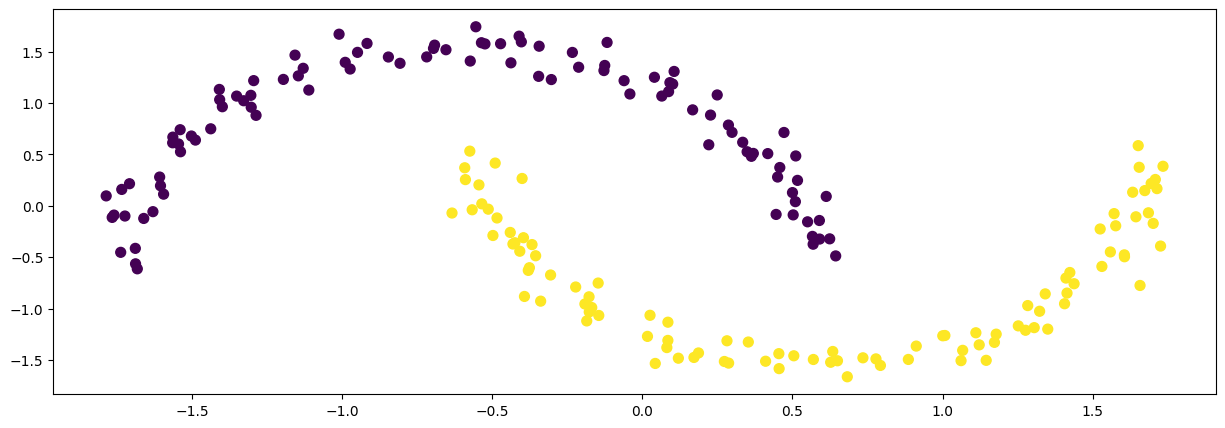

In [10]:
plt.figure(figsize=(15,5))
plt.scatter(x=n_data[:,0],y=n_data[:,1],c=y_pred,s=50,cmap='viridis')
plt.show()
plt.close()

In [11]:
from sklearn.metrics import silhouette_score

silhouette_score(n_data,y_pred)

0.3766163223777238